# A1 не сделал дополненый набор данных

In [ ]:
# Загрузка библиотек
import pandas as pd  # Для работы с данными в виде таблиц (DataFrame), удобное манипулирование и анализ данных
import numpy as np  # Для выполнения числовых операций, работа с массивами и матрицами
import matplotlib.pyplot as plt  # Для построения графиков и визуализации данных
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающую и тестовую выборки
from sklearn.feature_extraction.text import TfidfVectorizer  # Для преобразования текстов в векторы с использованием TF-IDF метода (важность слов)
from keras.models import Sequential  # Для создания и обучения последовательных нейронных сетей
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional  # Для добавления слоев в нейронную сеть (LSTM для работы с последовательностями, Dense — полносвязный слой, Dropout — регуляризация)
import keras  # Основной модуль для работы с нейронными сетями (в частности, TensorFlow/Keras API)
#import keras_tuner as kt  # Модуль для автоматического подбора гиперпараметров модели (например, количество нейронов, слоев и т.д.)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Метрики для оценки качества регрессионной модели (средняя абсолютная ошибка, средняя квадратичная ошибка, коэффициент детерминации)
from keras.preprocessing.sequence import pad_sequences  # Для выравнивания последовательностей (например, для обработки текстов переменной длины перед подачей в нейронную сеть)
from datetime import datetime  # Для работы с датами и временем (например, для отметки времени, преобразования форматов дат)
import seaborn as sns  # Для создания статистических графиков и визуализаций (альтернатива Matplotlib с более красивыми и понятными графиками)
from datetime import datetime, timedelta  # Для работы с датами и интервалами времени




import warnings  # Модуль для управления предупреждениями (например, для отключения ненужных предупреждений)
warnings.filterwarnings("ignore")  # Игнорирование предупреждений (чтобы не засорять вывод ненужными сообщениями)

In [201]:
# загрузка всех датафреймов и извлечение фичь
import pandas as pd

# Список путей к файлам
file_paths = [
    r'D:\data science\world_skils\Data\Data\02_03.csv',
    r'D:\data science\world_skils\Data\Data\04_05.csv',
    r'D:\data science\world_skils\Data\Data\06_07.csv',
    r'D:\data science\world_skils\Data\Data\08_09.csv',
    r'D:\data science\world_skils\Data\Data\10_11.csv',
    r'D:\data science\world_skils\Data\Data\12_13.csv',
    r'D:\data science\world_skils\Data\Data\14_15.csv',
    r'D:\data science\world_skils\Data\Data\16_17.csv',
    r'D:\data science\world_skils\Data\Data\18_19.csv'
]


dataframes = []

for file_path in file_paths:

    df = pd.read_csv(file_path,sep=';')
    

    df['datetime'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'], format='%d.%m.%Y %H:%M:%S')
    

    df.drop(['DATE', 'TIME'], axis=1, inplace=True)
    

    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['weekday'] = df['datetime'].dt.weekday
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute
    

    dataframes.append(df)


df1 = pd.concat(dataframes, ignore_index=True)


In [202]:
df1

,OPEN,MAX,MIN,CLOSE,VOLUME,datetime,year,month,day,weekday,hour,minute
0,373.00,374.5,373.00,374.50,5064,2002-01-03 11:00:00,2002,1,3,3,11,0
1,374.50,375.4,374.01,374.01,8450,2002-01-03 11:01:00,2002,1,3,3,11,1
2,374.12,375.2,374.10,374.65,507,2002-01-03 11:02:00,2002,1,3,3,11,2
3,374.65,375.0,374.03,375.00,1669,2002-01-03 11:03:00,2002,1,3,3,11,3
4,375.00,375.6,375.00,375.60,4000,2002-01-03 11:04:00,2002,1,3,3,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2208056,5183.50,5183.5,5183.50,5183.50,31523,2019-08-23 18:45:00,2019,8,23,4,18,45
2208057,5183.50,5183.5,5183.50,5183.50,5090,2019-08-23 18:46:00,2019,8,23,4,18,46
2208058,5183.50,5183.5,5183.50,5183.50,230,2019-08-23 18:47:00,2019,8,23,4,18,47
2208059,5183.50,5183.5,5183.50,5183.50,5,2019-08-23 18:48:00,2019,8,23,4,18,48


In [203]:
# дубликатов не обнаруженно
df1.duplicated().sum()

0

In [204]:
# пропусков нет
df1.isna().sum().sum()

0

# A2

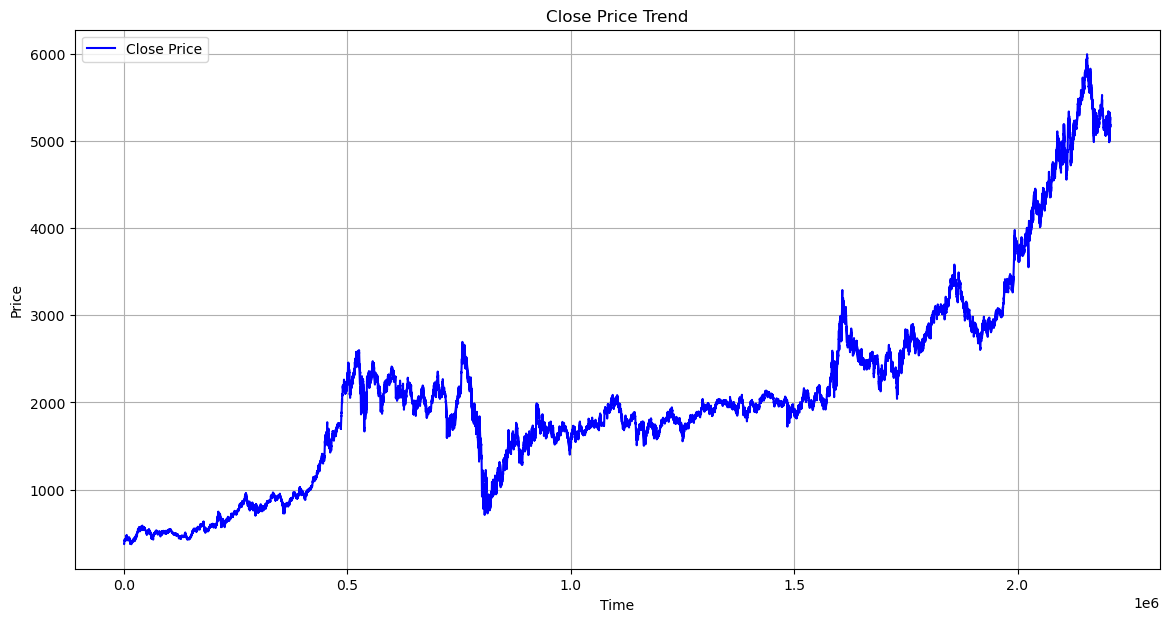

In [205]:
# смотрим трен рядов
import matplotlib.pyplot as plt
df = df1
plt.figure(figsize=(14, 7))
plt.plot(df['CLOSE'], label='Close Price', color='blue')
plt.title('Close Price Trend')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

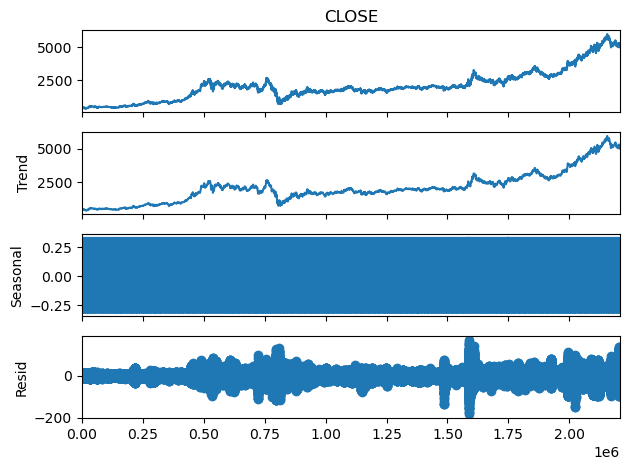

In [206]:
# смотрим шум, тренд, сезонность
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда (модель аддитивная, период указывается в зависимости от данных)
result = seasonal_decompose(df['CLOSE'], model='additive', period=365)

# Построение графиков
result.plot()
plt.show()

<Figure size 1000x500 with 0 Axes>

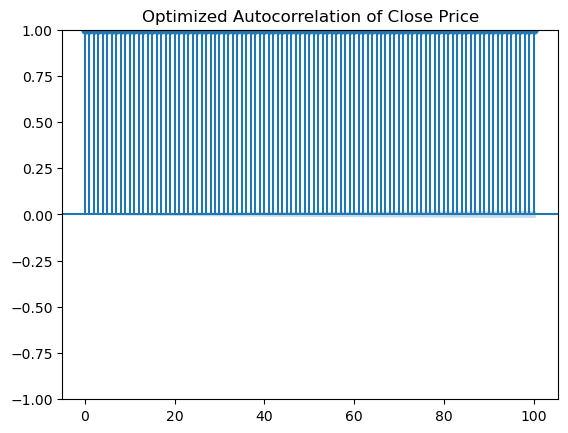

In [207]:
# смотрим график автокореляции
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

MAX_LAGS = 100  # Ограничиваем количество лагов
USE_FFT = True  # Включить FFT для ускорения

# График автокорреляции с оптимизациями
plt.figure(figsize=(10, 5))
plot_acf(df['CLOSE'], lags=MAX_LAGS, fft=USE_FFT, alpha=0.05)
plt.title('Optimized Autocorrelation of Close Price')
plt.show()

# исследуем ряд на стационарность

Основная идея теста заключается в подтверждении или отклонении двух гипотез:

Нулевая гипотеза (H0): предполагает, что временной ряд имеет единичный корень, то есть он нестационарный
.

Альтернативная гипотеза (H1): предполагает, что временной ряд не имеет единичного корня, то есть он является стационарным. Если эта гипотеза верна, то у нас есть список покупок подарков на определенный временной период, в котором количество подарков для близких коллег и знакомых будет неизменно.

Для подтверждения или опровержения этих гипотез используются p -values значения.

p -values — это наименьшее значение уровня значимости (то есть вероятности отказа от справедливой гипотезы).

В случае если p –values больше значения 5%, то мы отвергаем нулевую гипотезу, и, следовательно, ряд является стационарным, имеет определенную периодичность, которую возможно выявить.

In [208]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

ts = df1['CLOSE']  

# ADF тест


sample_rate = 10  # Можно увеличить для большей скорости, например 100, 1000
ts_sampled = ts[::sample_rate] # Берем каждый sample_rate-й элемент

# ADF тест на выборке
result_sampled = adfuller(ts_sampled.dropna())
print('ADF Statistic (sampled):', result_sampled[0])
print('p-value (sampled):', result_sampled[1])
print('Critical Values (sampled):')
for key, value in result_sampled[4].items():
    print(f'\t{key}: {value}')

if result_sampled[1] > 0.05:
    print('Ряд не стационарен (принимаем H0) - на выборке')
else:
    print('Ряд стационарен (отвергаем H0) - на выборке')

if result_sampled[0] > result_sampled[4]['5%']:
    print('Единичные корни присутствуют - ряд не стационарен - на выборке')
else:
    print('Единичных корней нет - ряд стационарен - на выборке')

ADF Statistic (sampled): -0.03523701910275328
p-value (sampled): 0.9555191729385436
Critical Values (sampled):
	1%: -3.4303796239843245
	5%: -2.8615530934158775
	10%: -2.566776969153348
Ряд не стационарен (принимаем H0) - на выборке
Единичные корни присутствуют - ряд не стационарен - на выборке


# Вывод:



Оба критерия (p-value и сравнение ADF Statistic с критическими значениями) приводят к одному и тому же выводу: временной ряд 'CLOSE' не является стационарным. Это означает, что мы принимаем нулевую гипотезу (H0) о наличии единичного корня, что является признаком нестационарности.

На что это влияет:

Нестационарность временного ряда имеет серьезные последствия для дальнейшего анализа и моделирования:

Проблемы с классическими моделями временных рядов: Многие классические модели временных рядов (такие как ARIMA, Exponential Smoothing и др.) предполагают стационарность данных. Применение этих моделей к нестационарным рядам может привести к некорректным и ненадежным результатам.
Сложность прогнозирования: Нестационарные ряды имеют изменяющиеся во времени статистические характеристики (среднее значение, дисперсия, автокорреляция). Это делает прогнозирование на основе исторических данных гораздо более сложным и менее надежным. Прогнозы могут быть неточными и нестабильными.
Риск ложных корреляций (Spurious Regression): Если вы попытаетесь установить зависимость между двумя нестационарными временными рядами (например, построить регрессию), вы рискуете получить ложные корреляции. Это означает, что вы можете увидеть статистически значимую связь между рядами, которая на самом деле является случайной и не отражает реальной причинно-следственной связи. Оба ряда могут просто иметь тренд, и из-за этого казаться связанными.
Необходимость преобразований: Для работы с нестационарными временными рядами и применения к ним многих моделей, необходимо преобразовать их в стационарные. Наиболее распространенные методы преобразования:
Дифференцирование (Differencing): Вычисление разностей между последовательными значениями ряда. Первое дифференцирование (разность первого порядка) часто достаточно для устранения тренда и достижения стационарности.
Логарифмирование: Используется для стабилизации дисперсии, особенно если размах колебаний ряда увеличивается со временем. Часто применяется в сочетании с дифференцированием.
Сезонное дифференцирование: Для рядов с сезонностью, вычисляются разности между значениями ряда через сезонный период.
Декомпозиция временного ряда: Разложение ряда на тренд, сезонность и остаток. Моделирование остатка, который часто бывает стационарным.

на основе проделанного анализа наиболее подходящей архитектурой нейросети будет lst с bidirection слоем, так как архитектура "LSTM" специально разработана для обработки данных временных рядов с использованием ячеек памяти, которые сохраняют информацию в течение продолжительных периодов времени.

# A3

In [209]:
# импорт библиотек для разбиянения данных на выборки
import pandas as pd
from sklearn.model_selection import train_test_split   

In [ ]:
# делим выборки в соотношение 60/40 на 60 % будем обучать модель, а на 40 % проверим точность
train_df, test_df = train_test_split(df1, test_size=0.4, random_state=42)

In [211]:
# выбираем необходимые признаки для обучения неронной сети
X = train_df[['OPEN','MAX','MIN','year','month','day','weekday','hour','minute']].values
y = train_df['CLOSE'].values

In [212]:
# Разделяем данные на обучающую и валидационную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Для обучения неросети будем использовать Keras, Tenserflow.
Keras — это библиотека для языка программирования Python, которая предназначена для глубокого машинного обучения. Она позволяет быстрее создавать и настраивать модели — схемы, по которым распространяется и подсчитывается информация при обучении.

In [213]:
# приводим данные в нужный формат для обучения
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

оптимизатор Адама - это популярный алгоритм оптимизации, используемый для обновления weights and biases нейронной сети во время обучения. Он сочетает в себе преимущества двух других алгоритмов оптимизации: Adaptive Gradient Algorithm (AdaGrad) и Root Mean Square Propagation (RMSProp). Адам широко используется благодаря своей эффективности и результативности в широком спектре приложений

MSE. Среднеквадратичная ошибка (Mean Squared Error) применяется в случаях, когда требуется подчеркнуть большие ошибки и выбрать модель, которая дает меньше именно больших ошибок. Большие значения ошибок становятся заметнее за счет квадратичной зависимости.

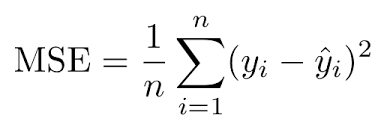

Функция ReLU обладает несколькими преимущества перед сигмоидой и гиперболическим тангенсом: Очень быстро и просто считается производная. Для отрицательных значений — 0, для положительных — 1. Разреженность активации. Она отлично бореться с затухающими градиентами.

Почему оценка происходит по val_loss, по скольку делать оценуку модели по тренироваочному лоссу (который считаеться на данных, которые модель уже видела при обучении) не коректно, поэтому оценка происходит по валидационной выборке.

Чем хорошь именно val_loss:

Оценка обобщающей способности: val_loss помогает определить, не переобучается ли модель на тренировочных данных. Если значение train_loss уменьшается, но val_loss растет, это признак переобучения.

Оптимизация модели: Сравнивая train_loss и val_loss, можно принимать решения о ранней остановке (early stopping), если val_loss перестает уменьшаться, что предотвращает дальнейшее переобучение и излишнюю сложность модели.

Выбор гиперпараметров: Значение val_loss можно использовать для настройки гиперпараметров модели (например, количество нейронов, регуляризация, скорость обучения), чтобы добиться лучшего баланса между обучением и обобщением.

Показатель стабильности модели: Если val_loss стабильно уменьшается, это говорит о том, что модель лучше обучается и становится более стабильной, в отличие от ситуации, когда val_loss колеблется или начинает расти.

In [214]:
# создем модель LSTM с Bidirectional слоем, будем использовать оптимизатор adam
model = Sequential()
# model.add(BatchNormalization()) 
model.add(Bidirectional(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.001))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [215]:
# сохраняем процесс обучения модели для того чтобы выбрать лучшую эпоху
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='mymodel.keras',
        # Путь по которому нужно сохранить модель
        # Два параметра ниже значат что мы перезапишем
        # текущий чекпоинт в том и только в том случае, когда
        # улучится значение `val_loss`.
        save_best_only=True,
        monitor='val_loss',
        verbose=100)
]

In [216]:
# обучаем и записываем историю модели для дальнейшего построения графиков
history = model.fit(X_train, y_train, epochs=10, batch_size=64, callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/10
16527/16561 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 80691.0859
Epoch 1: val_loss improved from inf to 11.58931, saving model to mymodel.keras
16561/16561 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 80545.6328 - val_loss: 11.5893
Epoch 2/10
16545/16561 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 379.8504
Epoch 2: val_loss did not improve from 11.58931
16561/16561 ━━━━━━━━━━━━━━━━━━━━ 16s 974us/step - loss: 379.8518 - val_loss: 107.2253
Epoch 3/10
16547/16561 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 375.2739
Epoch 3: val_loss did not improve from 11.58931
16561/16561 ━━━━━━━━━━━━━━━━━━━━ 16s 943us/step - loss: 375.2700 - val_loss: 90.9591
Epoch 4/10
16511/16561 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 373.6387
Epoch 4: val_loss did not improve from 11.58931
16561/16561 ━━━━━━━━━━━━━━━━━━━━ 16s 978us/step - loss: 373.6348 - val_loss: 14.6260
Epoch 5/10
16547/16561 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 369.4073
Epoch 5: val_loss did not improve from 11.58931
16561/16561

In [217]:
# выбираем лучшую модель
model2 = keras.models.load_model('mymodel.keras')

In [218]:
# приводим test в нужный вид для предсказания
test_df2 = test_df.sort_values("datetime")[['OPEN','MAX','MIN','year','month','day','weekday','hour','minute']].values

In [219]:
# изменяем размерность
test_df2 = test_df2.reshape((test_df2.shape[0], 1, test_df2.shape[1]))

In [220]:
# предсказываем стоимость
y_pred =  model2.predict(test_df2)

27601/27601 ━━━━━━━━━━━━━━━━━━━━ 12s 413us/step


In [221]:
y_pred

array([[ 372.98987],
       [ 374.0895 ],
       [ 373.94888],
       ...,
       [5168.602  ],
       [5170.614  ],
       [5169.929  ]], dtype=float32)

Анализ предсказанных занчений, сравнение.

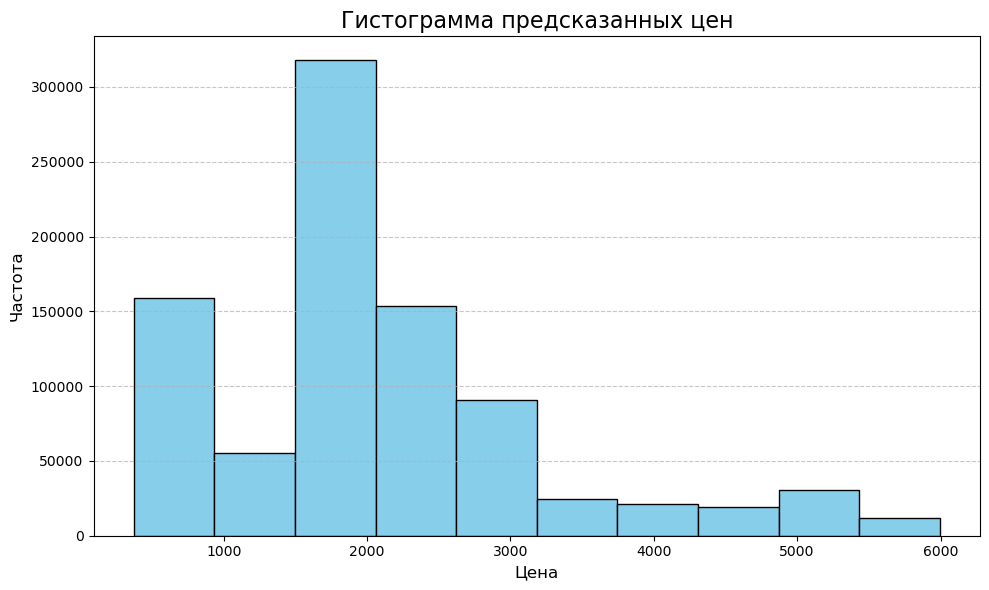

In [222]:
# выведим график предсказанной стоимость акции
plt.figure(figsize=(10, 6)) 
plt.hist(y_pred, bins=10, color='skyblue', edgecolor='black') 

# Настройка гистограммы
plt.title('Гистограмма предсказанных цен', fontsize=16) 
plt.xlabel('Цена', fontsize=12) 
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show()

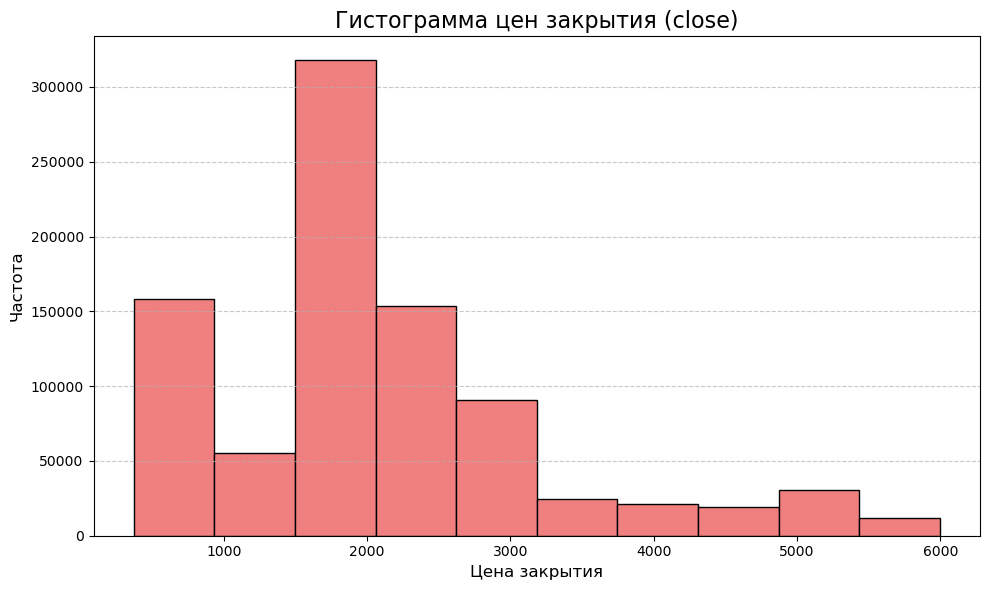

In [223]:
# вывод графика реальной стоимости акций
close_prices = test_df['CLOSE']

plt.figure(figsize=(10, 6))
plt.hist(close_prices, bins=10, color='lightcoral', edgecolor='black') 


plt.title('Гистограмма цен закрытия (close)', fontsize=16)
plt.xlabel('Цена закрытия', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [224]:
# сортируем данные по дате и времени
test_df.sort_values("datetime")

,OPEN,MAX,MIN,CLOSE,VOLUME,datetime,year,month,day,weekday,hour,minute
0,373.00,374.5,373.00,374.50,5064,2002-01-03 11:00:00,2002,1,3,3,11,0
1,374.50,375.4,374.01,374.01,8450,2002-01-03 11:01:00,2002,1,3,3,11,1
2,374.12,375.2,374.10,374.65,507,2002-01-03 11:02:00,2002,1,3,3,11,2
3,374.65,375.0,374.03,375.00,1669,2002-01-03 11:03:00,2002,1,3,3,11,3
7,374.90,375.0,374.01,374.01,6000,2002-01-03 11:07:00,2002,1,3,3,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2208049,5170.00,5170.0,5166.00,5167.50,1514,2019-08-23 18:33:00,2019,8,23,4,18,33
2208051,5169.50,5170.5,5168.00,5170.00,970,2019-08-23 18:35:00,2019,8,23,4,18,35
2208052,5170.00,5170.0,5166.00,5166.50,1350,2019-08-23 18:36:00,2019,8,23,4,18,36
2208054,5170.00,5172.0,5169.50,5170.50,2655,2019-08-23 18:38:00,2019,8,23,4,18,38


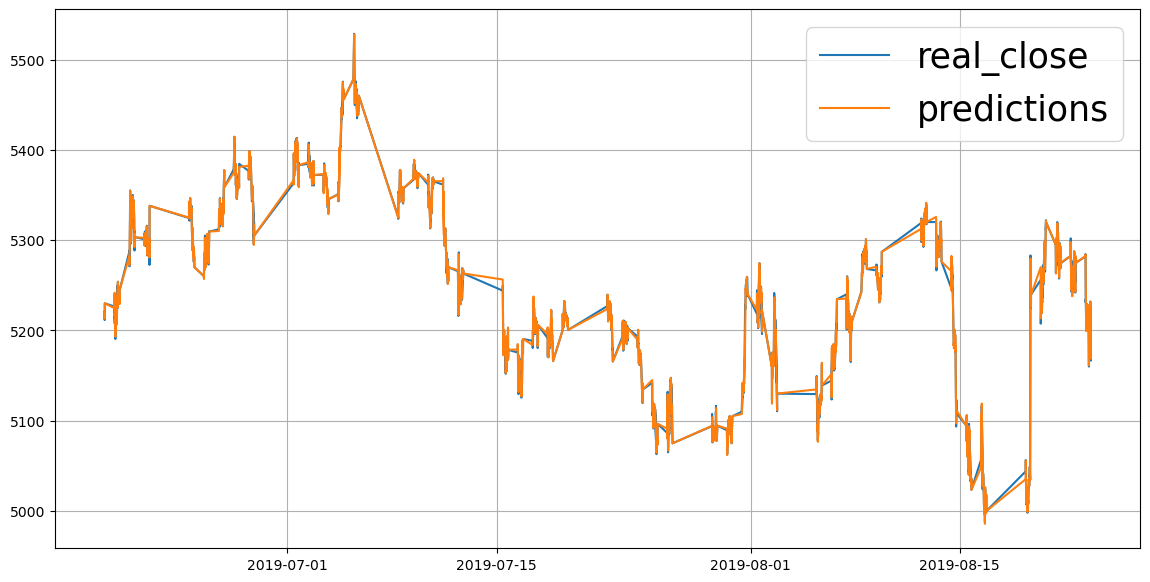

In [227]:
# вывод сравнения реальной стоимость и предсказанной
plt.figure(figsize=(14, 7))
plt.plot(test_df.sort_values("datetime")['datetime'][-10000:], test_df.sort_values("datetime")['CLOSE'][-10000:], label='real_close')
    
# Линия для предсказаний
plt.plot(test_df.sort_values("datetime")['datetime'][-10000:], y_pred[-10000:], label='predictions', linestyle='-')
# plt.plot(df['date'], df['predictions']-2.3, label='predictions', linestyle='-')

plt.legend(fontsize=25)
plt.grid(True)

# Показать график
plt.show()

Если сравнить графики реальной и предсказанной стоимость, то различий практически нет, модель имеет очень хорошее качество

# вывод автокореляции и Кривые валидации (график обучения)

График автокорреляции - это мощный инструмент для анализа временных рядов. Он позволяет визуально оценить зависимости между значениями ряда на разных временных лагах и получить ценную информацию о стационарности, сезонности, тренде и случайности данных, что важно для построения и оценки моделей временных рядов, включая LSTM.

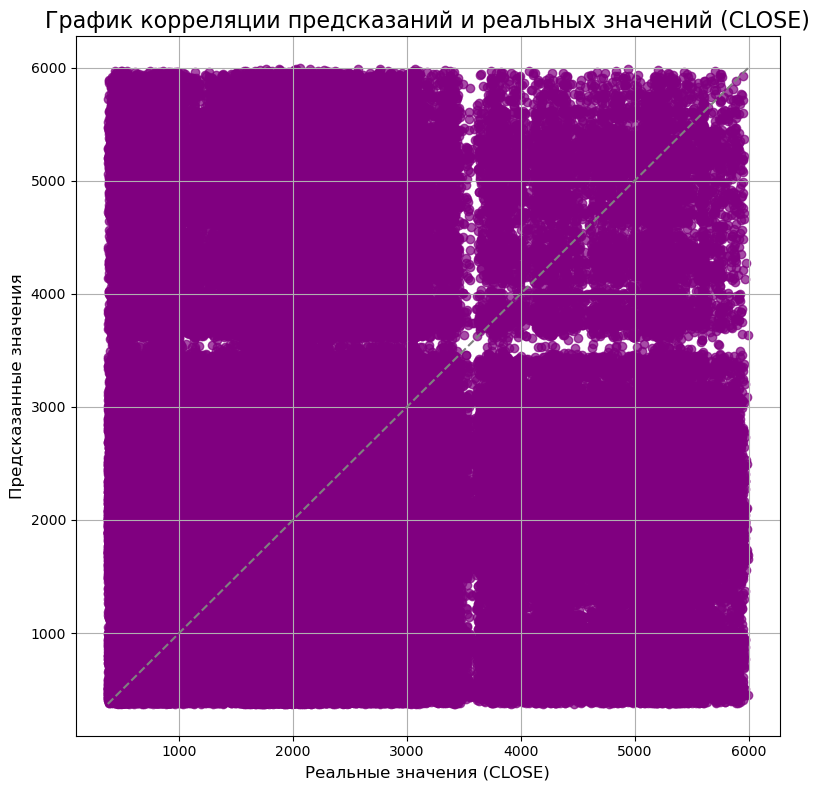

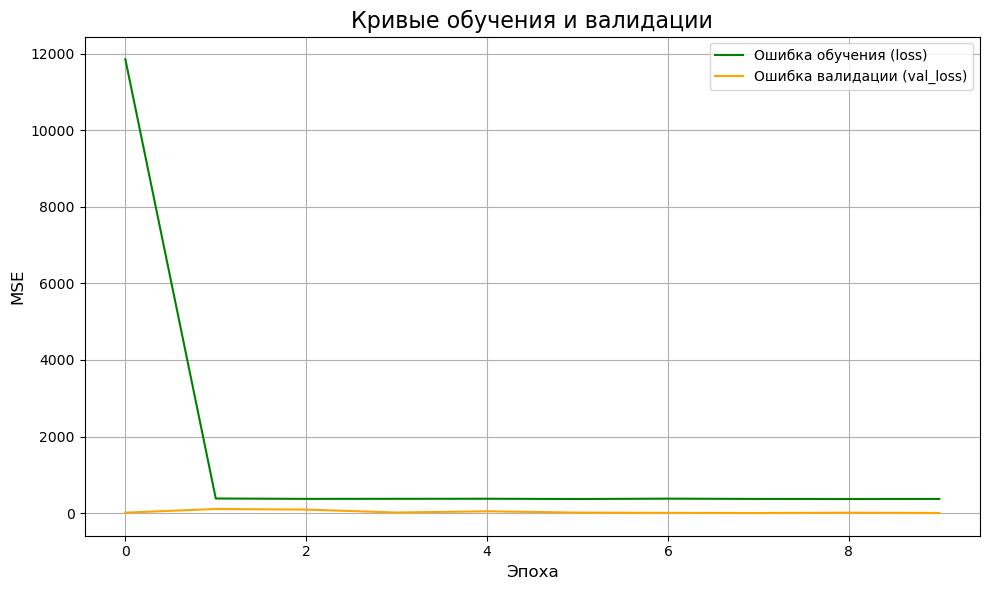

In [226]:
# График корреляции
plt.figure(figsize=(8, 8))
plt.scatter(test_df['CLOSE'].values, y_pred, color='purple', alpha=0.7) 
plt.title('График корреляции предсказаний и реальных значений (CLOSE)', fontsize=16)
plt.xlabel('Реальные значения (CLOSE)', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.grid(True)
plt.plot([min(test_df['CLOSE'].values), max(test_df['CLOSE'].values)], [min(test_df['CLOSE'].values), max(test_df['CLOSE'].values)], color='gray', linestyle='--') # Линия идеального соответствия
plt.tight_layout()
plt.show()

# Кривые валидации (график обучения)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Ошибка обучения (loss)', color='green')
plt.plot(history.history['val_loss'], label='Ошибка валидации (val_loss)', color='orange')
plt.title('Кривые обучения и валидации', fontsize=16)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# A4

Вывод:
Был проведен анализ данных в результате которого была выбрана модель LSTM, она практически идеально справилась с задачей прогоноза стоимость акций.